# **Project Name**    - Customer Satisfaction (CSAT) scores using Deep Learning Artificial Neural Networks (ANN)



##### **Project Type**    - Supervised Learning – Classification
##### **Contribution**    - Mritunjay Mishra

# **Project Summary -**

This project focuses on predicting Customer Satisfaction (CSAT) scores using Deep Learning techniques, specifically Artificial Neural Networks (ANN). In the e-commerce industry, customer satisfaction is a key factor that helps businesses grow by improving customer retention, service quality, and overall user experience. Traditionally, companies rely on feedback surveys to measure CSAT scores. However, surveys may not always be accurate or timely, and many customers might not respond at all. This project aims to build a system that can predict CSAT scores based on customer interaction data—without having to wait for survey responses.

The dataset used in this project comes from an e-commerce platform named Shopzilla. It contains a wide range of information related to customer support interactions, such as the communication channel (email, call, chat, etc.), issue category and sub-category, customer remarks or feedback, product and order details, timestamps of various events (like when the issue was reported or resolved), item price, customer location, and the names of customer support agents, supervisors, and managers. The main target variable is the CSAT score, which reflects how satisfied the customer was after the interaction.

To begin with, the project involves cleaning and preparing the data. This includes identifying and handling missing values, removing duplicates, and converting text and date columns into usable formats. Since the data has both structured (like numbers and categories) and unstructured (like customer remarks) types, special preprocessing techniques will be applied depending on the type of feature.

Next, feature engineering will be used to extract meaningful insights from the existing data. For instance, new columns might be created by calculating the time taken to respond to a complaint or by analyzing the tone of the customer's feedback using sentiment analysis.

After the data is cleaned and prepared, a deep learning model will be built using an Artificial Neural Network. The model will take all the processed features as input and learn the patterns that influence customer satisfaction. The goal is to train the model to predict the CSAT score as accurately as possible based on the interaction details.

Once the model is trained, it will be evaluated using suitable methods to check how well it performs. The final model should be able to help the business by providing real-time predictions of customer satisfaction, even before the customer fills out a feedback form. This can help companies respond more quickly to unhappy customers and continuously improve their service.

In the final stage of the project, the model can be deployed locally using tools like Flask, so that it can be integrated into a working system. The predicted scores can be visualized in dashboards, helping customer service teams and managers track performance, identify trends, and make better decisions.

This project not only helps in building a predictive model using deep learning, but also gives valuable experience in data preprocessing, feature engineering, model training, and deployment. It is a step towards using AI to create smarter, more responsive customer service systems in the e-commerce industry.


# **GitHub Link -**

https://github.com/Jay-mishra04/Capstone-Project-Deep-Learning-.git


# **Problem Statement**


**Write Problem Statement Here.**

In the e-commerce industry, customer satisfaction is a key factor that directly affects customer loyalty, brand image, and long-term business success. Traditionally, companies rely on survey forms to collect Customer Satisfaction (CSAT) scores after a support interaction. However, these surveys are often delayed, incomplete, or ignored by many customers. As a result, businesses may miss timely opportunities to resolve issues or improve their services.

The challenge is to develop an intelligent system that can automatically predict CSAT scores using available data from customer support interactions. This includes information such as the communication channel, category of the issue, feedback remarks, timestamps, agent details, product and order information, and more.

The goal is to create a deep learning-based model that can accurately forecast customer satisfaction levels using these features. Such a system would allow companies to monitor customer experience in real time, identify pain points early, and take necessary actions to improve service quality without depending solely on survey responses.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [14]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Dataset Loading

In [16]:
# importing the dataset
df = pd.read_csv('eCommerce_Customer_support_data.csv')

### Dataset First View

In [18]:
# Dataset First Look
df.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


### Dataset Rows & Columns count

In [20]:
# Dataset Rows & Columns count
print("Rows in the dataset:", df.shape[0])
print("COlumns in the dataset:", df.shape[1])

Rows in the dataset: 85907
COlumns in the dataset: 20


### Dataset Information

In [22]:
# Dataset Info
print("Information about the dataset:")
print(df.info())

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    floa

#### Duplicate Values

In [24]:
# Dataset Duplicate Value Count
print("Number of duplicated values:", df.duplicated().sum())

Number of duplicated values: 0


#### Missing Values/Null Values

In [26]:
# Missing Values/Null Values Count
print("Missing values in the dataset:")
missing_values = df.isnull().sum().reset_index()
missing_values.columns = ["Column_Name", "Missing_Values"]
missing_values["Percentage"] = (missing_values["Missing_Values"] / df.shape[0]) *100
missing_values

Missing values in the dataset:


,Column_Name,Missing_Values,Percentage
0,Unique id,0,0.000000
1,channel_name,0,0.000000
2,category,0,0.000000
3,Sub-category,0,0.000000
4,Customer Remarks,57165,66.542889
5,Order_id,18232,21.222950
6,order_date_time,68693,79.962052
7,Issue_reported at,0,0.000000
8,issue_responded,0,0.000000
9,Survey_response_Date,0,0.000000


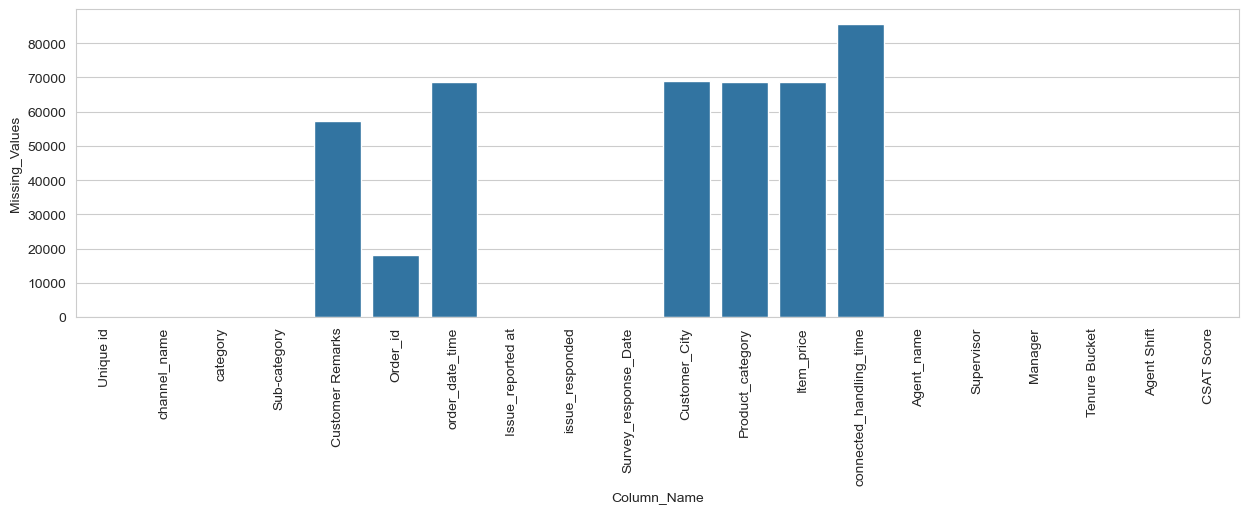

In [27]:
# Visualizing the missing values
sns.set_style("whitegrid")
plt.figure(figsize = (15,4))
sns.barplot(x = 'Column_Name', y= 'Missing_Values', data = missing_values)
plt.xticks(rotation = 90)
plt.show()

### What did you know about your dataset?

--

## 🔢 1. Rows & Columns Count
- **Total Rows (Records):** `85,907`
- **Total Columns (Features):** `20`

---

## 🧾 2. Dataset Information
The dataset contains 20 columns with a mix of data types:
- **Object:** 17 columns (mostly categorical and textual data)
- **Float64:** 2 columns (`Item_price`, `connected_handling_time`)
- **Int64:** 1 column (`CSAT Score`)

Some columns like `order_date_time` can be converted to `datetime` format for better handling of time-based features.

---

## ❗ 3. Duplicate Values
- **Number of duplicate rows:** `0`
- ✅ Dataset has **no duplicate records**.

---

## ⚠️ 4. Missing Values (Top Columns with High Nulls)
| Column Name              | Missing Values |
|--------------------------|----------------|
| connected_handling_time | 85,665         |
| order_date_time         | 68,693         |
| Customer_City           | 68,828         |
| Product_category        | 68,711         |
| Item_price              | 68,701         |
| Customer Remarks        | 57,165         |
| Order_id                | 18,232         |

> Many columns have significant missing data and will require **cleaning** or **imputation** strategies before model training.

---

## 📋 Summary
- The dataset is **rich in customer service records**, but **several features have missing values**.
- No duplicate rows are found.
- Multiple timestamp fields are present — useful for **time-based feature engineering**.
- Important numeric columns like `Item_price` and `handling time` have missing data and need preprocessing.


## ***2. Understanding Your Variables***

In [31]:
# Dataset Columns
print("Names of columns:")
print(df.columns.tolist())

Names of columns:
['Unique id', 'channel_name', 'category', 'Sub-category', 'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at', 'issue_responded', 'Survey_response_Date', 'Customer_City', 'Product_category', 'Item_price', 'connected_handling_time', 'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift', 'CSAT Score']


In [32]:
# Dataset Describe
print("Print Description of the dataset:")
df.describe(include = 'all')

Print Description of the dataset:


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
count,85907,85907,85907,85907,28742,67675,17214,85907,85907,85907,17079,17196,17206.000000,242.000000,85907,85907,85907,85907,85907,85907.000000
unique,85907,3,12,57,18231,67675,13766,30923,30262,31,1782,9,NaN,NaN,1371,40,6,5,5,NaN
top,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Inbound,Returns,Reverse Pickup Enquiry,Good,c27c9bb4-fa36-4140-9f1f-21009254ffdb,09/08/2023 11:55,15/08/2023 10:59,28/08/2023 00:00,28-Aug-23,HYDERABAD,Electronics,NaN,NaN,Wendy Taylor,Carter Park,John Smith,>90,Morning,NaN
freq,1,68142,44097,22389,1390,1,7,13,3378,3452,722,4706,NaN,NaN,429,4273,25261,30660,41426,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5660.774846,462.400826,NaN,NaN,NaN,NaN,NaN,4.242157
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12825.728411,246.295037,NaN,NaN,NaN,NaN,NaN,1.378903
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,392.000000,293.000000,NaN,NaN,NaN,NaN,NaN,4.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,979.000000,427.000000,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2699.750000,592.250000,NaN,NaN,NaN,NaN,NaN,5.000000


### Variables Description 


---

## 1. Unique id
- **Meaning:** Unique identifier for each record.
- **Type:** Categorical (object)
- **Count:** 85,907
- **Unique:** 85,907
- **Top Value:** `7e9ae164-6a8b-4521-a2d4-58f7c9fff13f`
- **Frequency:** 1

---

## 2. channel_name
- **Meaning:** Channel used by the customer to raise an issue (e.g., Inbound, Outbound, Email).
- **Type:** Categorical
- **Count:** 85,907
- **Unique:** 3
- **Top Value:** `Inbound`
- **Frequency:** 68,142

---

## 3. category
- **Meaning:** Main category of the issue (e.g., Returns, Delivery Issue).
- **Type:** Categorical
- **Count:** 85,907
- **Unique:** 12
- **Top Value:** `Returns`
- **Frequency:** 44,097

---

## 4. Sub-category
- **Meaning:** More specific classification under the main category.
- **Type:** Categorical
- **Count:** 85,907
- **Unique:** 57
- **Top Value:** `Reverse Pickup Enquiry`
- **Frequency:** 22,389

---

## 5. Customer Remarks
- **Meaning:** Actual text feedback or comments from the customer.
- **Type:** Text
- **Count:** 28,742
- **Unique:** 18,231
- **Top Value:** `Good`
- **Frequency:** 1,390

---

## 6. Order_id
- **Meaning:** Order number related to the customer issue.
- **Type:** Categorical
- **Count:** 67,675
- **Unique:** 67,675
- **Top Value:** `c27c9bb4-fa36-4140-9f1f-21009254ffdb`
- **Frequency:** 1

---

## 7. order_date_time
- **Meaning:** Timestamp when the customer placed the order.
- **Type:** Datetime
- **Count:** 17,214
- **Unique:** 13,766
- **Top Value:** `09/08/2023 11:55`
- **Frequency:** 7

---

## 8. Issue_reported at
- **Meaning:** Timestamp when the issue was reported.
- **Type:** Datetime
- **Count:** 85,907
- **Unique:** 30,923
- **Top Value:** `15/08/2023 10:59`
- **Frequency:** 13

---

## 9. issue_responded
- **Meaning:** Timestamp when the support team responded.
- **Type:** Datetime
- **Count:** 85,907
- **Unique:** 30,262
- **Top Value:** `28/08/2023 00:00`
- **Frequency:** 3,378

---

## 10. Survey_response_Date
- **Meaning:** Date on which the customer filled the CSAT survey.
- **Type:** Date
- **Count:** 85,907
- **Unique:** 31
- **Top Value:** `28-Aug-23`
- **Frequency:** 3,452

---

## 11. Customer_City
- **Meaning:** City where the customer resides.
- **Type:** Categorical
- **Count:** 17,079
- **Unique:** 1,782
- **Top Value:** `HYDERABAD`
- **Frequency:** 722

---

## 12. Product_category
- **Meaning:** Type of product involved in the issue (e.g., Electronics, Fashion).
- **Type:** Categorical
- **Count:** 17,196
- **Unique:** 9
- **Top Value:** `Electronics`
- **Frequency:** 4,706

---

## 13. Item_price
- **Meaning:** Price of the item purchased.
- **Type:** Numerical (float)
- **Count:** 17,206
- **Mean:** ₹5,660.77
- **Std Dev:** ₹12,825.73
- **Min:** ₹0.00
- **25%:** ₹392.00
- **Median (50%):** ₹979.00
- **75%:** ₹2,699.75
- **Max:** ₹1,64,999.00

---

## 14. connected_handling_time
- **Meaning:** Time taken by the agent to handle the issue (in seconds).
- **Type:** Numerical (float)
- **Count:** 242
- **Mean:** 462.40 seconds
- **Std Dev:** 246.30 seconds
- **Min:** 0.00
- **25%:** 293.00
- **Median (50%):** 427.00
- **75%:** 592.25
- **Max:** 1,986.00

---

## 15. Agent_name
- **Meaning:** Name of the support agent.
- **Type:** Categorical
- **Count:** 85,907
- **Unique:** 1,371
- **Top Value:** `Wendy Taylor`
- **Frequency:** 429

---

## 16. Supervisor
- **Meaning:** Supervisor overseeing the support agent.
- **Type:** Categorical
- **Count:** 85,907
- **Unique:** 40
- **Top Value:** `Carter Park`
- **Frequency:** 4,273

---

## 17. Manager
- **Meaning:** Manager above the supervisor.
- **Type:** Categorical
- **Count:** 85,907
- **Unique:** 6
- **Top Value:** `John Smith`
- **Frequency:** 25,261

---

## 18. Tenure Bucket
- **Meaning:** Agent's experience level (e.g., in months or years).
- **Type:** Categorical
- **Count:** 85,907
- **Unique:** 5
- **Top Value:** `>90`
- **Frequency:** 30,660

---

## 19. Agent Shift
- **Meaning:** Shift in which the agent worked (e.g., Morning, Night).
- **Type:** Categorical
- **Count:** 85,907
- **Unique:** 5
- **Top Value:** `Mornin- **Meaning:** Customer Satisfaction Score (1–5).
- **Type:** Numerical (int)
- **Count:** 85,907
- **Mean:** 4.24
- **Std Dev:** 1.38
- **Min:** 1.00
- **25%:** 4.00
- **Median (50%):** 5.00
- **75%:** 5.00
- **Max:** 5.00
**Count:** 85,907
- **Unique:** 5
- **Top Value:** `Morning`
- **Frequency:** 41,426

---

## 20. CSAT Score
- **Meaning:** Customer Satisfaction Score (1–5).
- **Type:** Numerical (int)
- **Count:**


### Check Unique Values for each variable.

In [36]:
# Check Unique Values for each variable.
for i in df.columns:
    print(f"Unique Values in {i} column:", df[i].unique(), "------->", df[i].nunique())
    print("-"*100)

Unique Values in Unique id column: ['7e9ae164-6a8b-4521-a2d4-58f7c9fff13f'
 'b07ec1b0-f376-43b6-86df-ec03da3b2e16'
 '200814dd-27c7-4149-ba2b-bd3af3092880' ...
 '723bce2c-496c-4aa8-a64b-ca17004528f0'
 '707528ee-6873-4192-bfa9-a491f1c08ab5'
 '07c7a878-0d5a-42e0-97ef-de59abec0238'] -------> 85907
----------------------------------------------------------------------------------------------------
Unique Values in channel_name column: ['Outcall' 'Inbound' 'Email'] -------> 3
----------------------------------------------------------------------------------------------------
Unique Values in category column: ['Product Queries' 'Order Related' 'Returns' 'Cancellation'
 'Shopzilla Related' 'Payments related' 'Refund Related' 'Feedback'
 'Offers & Cashback' 'Onboarding related' 'Others' 'App/website'] -------> 12
----------------------------------------------------------------------------------------------------
Unique Values in Sub-category column: ['Life Insurance' 'Product Specific Informati

## 3. ***Data Wrangling***

### Data Wrangling Code

In [39]:
df['Customer Remarks'] = df['Customer Remarks'].fillna("No Remarks")
df['Customer_City'] = df['Customer_City'].fillna("Unknown")
df['Product_category'] = df['Product_category'].fillna("Unknown")
df['Item_price'] = df['Item_price'].fillna(0)

In [40]:
# checking if all the missing values in order_id column are NaN values
print("Duplicated values in Order_id column:", df['Order_id'].duplicated().sum())
print("Null Values in Order_id column:", df['Order_id'].isnull().sum())
# removing the order_id column also as no order_id is repeated so there is no point of performing eda on it

Duplicated values in Order_id column: 18231
Null Values in Order_id column: 18232


In [41]:
# Dropping the columns that are not needed for the EDA
try:
    df.drop(columns = ['Order_id', 'order_date_time', 'connected_handling_time'], inplace = True)
except:
    print("Columns are already deleted or Columns are not found")

In [42]:
# Checking for the null values 
df.isnull().sum()

Unique id               0
channel_name            0
category                0
Sub-category            0
Customer Remarks        0
Issue_reported at       0
issue_responded         0
Survey_response_Date    0
Customer_City           0
Product_category        0
Item_price              0
Agent_name              0
Supervisor              0
Manager                 0
Tenure Bucket           0
Agent Shift             0
CSAT Score              0
dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unique id             85907 non-null  object 
 1   channel_name          85907 non-null  object 
 2   category              85907 non-null  object 
 3   Sub-category          85907 non-null  object 
 4   Customer Remarks      85907 non-null  object 
 5   Issue_reported at     85907 non-null  object 
 6   issue_responded       85907 non-null  object 
 7   Survey_response_Date  85907 non-null  object 
 8   Customer_City         85907 non-null  object 
 9   Product_category      85907 non-null  object 
 10  Item_price            85907 non-null  float64
 11  Agent_name            85907 non-null  object 
 12  Supervisor            85907 non-null  object 
 13  Manager               85907 non-null  object 
 14  Tenure Bucket         85907 non-null  object 
 15  Agent Shift        

In [44]:
df['Issue_reported at'] = pd.to_datetime(df['Issue_reported at'], format="%d/%m/%Y %H:%M")
df['issue_responded'] = pd.to_datetime(df['issue_responded'], format="%d/%m/%Y %H:%M")
df['Survey_response_Date'] = pd.to_datetime(df['Survey_response_Date'], format= "%d-%b-%y")

# converting csat score to string only for the EDA Purpose only 
df['CSAT Score'] = df['CSAT Score'].astype('str')

# making new column csat in integer format, if required in future
df['CSAT_Score_int'] = df['CSAT Score'].astype('int')

In [45]:
# checking that issue responded is earlier than the issue reported  (as it is not possible)
inconsistent_entry = df[df['issue_responded'] < df['Issue_reported at']]
inconsistent_entry.head(3)

,Unique id,channel_name,category,Sub-category,Customer Remarks,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,CSAT_Score_int
74172,8a3b660a-3a3d-4761-8ccc-553c7e82c592,Inbound,Refund Related,COD Refund Details,No Remarks,2023-08-28 16:07:00,2023-08-28,2023-08-28,BHAGALPUR,LifeStyle,323.0,Steven Wall,Zoe Yamamoto,Emily Chen,>90,Afternoon,5,5
74173,4f1e4d87-44f8-4a6e-9952-385e27ccc4ae,Outcall,Returns,Reverse Pickup Enquiry,No Remarks,2023-08-28 16:56:00,2023-08-28,2023-08-28,Unknown,Unknown,0.0,Brittney Key,Mia Yamamoto,Jennifer Nguyen,On Job Training,Morning,3,3
74174,b8f28222-bf9d-4509-9b2b-6e36d10c9e87,Inbound,Payments related,Online Payment Issues,No Remarks,2023-08-28 20:14:00,2023-08-28,2023-08-28,Unknown,Unknown,0.0,Brian Koch,Ethan Tan,Jennifer Nguyen,On Job Training,Evening,5,5


In [46]:
# rows with inconsistent data
inconsistent_entry.shape[0] 

3128

In [47]:
# responded and reported at same time
df[df['issue_responded'] == df['Issue_reported at']].shape

(2448, 18)

In [48]:
# checking the percentage of inconsistent data 
inconsistent_entry.shape[0] / df.shape[0] * 100

3.6411468215628533

In [49]:
# as the percentage of inconsistent data is very low so deleting them 
print("DataFrame shape before deleting the inconsistencies:", df.shape)
df = df[df['issue_responded'] >= df['Issue_reported at']]
print("DataFrame shape after deleting the inconsistencies:", df.shape)

DataFrame shape before deleting the inconsistencies: (85907, 18)
DataFrame shape after deleting the inconsistencies: (82779, 18)


In [50]:
# creating new features 
df['response_time'] = (df['issue_responded'] - df['Issue_reported at']).dt.total_seconds() / 60 
df['survey_delay'] = (df['Survey_response_Date'].dt.date - df['issue_responded'].dt.date).apply(lambda x: x.days)

In [51]:
df.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,CSAT_Score_int,response_time,survey_delay
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,No Remarks,2023-08-01 11:13:00,2023-08-01 11:47:00,2023-08-01,Unknown,Unknown,0.0,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5,5,34.0,0
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,No Remarks,2023-08-01 12:52:00,2023-08-01 12:54:00,2023-08-01,Unknown,Unknown,0.0,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5,5,2.0,0
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,No Remarks,2023-08-01 20:16:00,2023-08-01 20:38:00,2023-08-01,Unknown,Unknown,0.0,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5,5,22.0,0
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,No Remarks,2023-08-01 20:56:00,2023-08-01 21:16:00,2023-08-01,Unknown,Unknown,0.0,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5,5,20.0,0
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,No Remarks,2023-08-01 10:30:00,2023-08-01 10:32:00,2023-08-01,Unknown,Unknown,0.0,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5,5,2.0,0


### What all manipulations have you done and insights you found?


This summary outlines all key steps taken during the data preprocessing stage and the insights derived at each stage. It is designed to prepare the dataset for effective exploratory data analysis (EDA) and modeling.

---

## 🔹 1. Handling Missing Values

To retain as much data as possible, missing values were handled using meaningful defaults:
- Textual fields like **Customer Remarks** were filled with `"No Remarks"` to preserve context.
- Categorical fields such as **Customer City** and **Product Category** were filled with `"Unknown"`.
- Numerical fields like **Item Price** were replaced with `0`.

### 🔍 Insight:
Filling missing values allowed retention of rows and prevented issues in analysis or modeling. It also ensured consistency in the dataset without sacrificing completeness.

---

## 🔹 2. Removing Unnecessary Columns

Columns like `Order ID`, `Order Date Time`, and `Connected Handling Time` were removed because:
- **Order ID** was found to have 100% duplicate values and missing entries.
- **Order Date Time** was not contributing to time-based metrics like response time or delay.
- **Connected Handling Time** had excessive missing values.

### 🔍 Insight:
Removing irrelevant or problematic columns reduced dataset noise and simplified analysis.

---

## 🔹 3. Formatting Date and Time Columns

Date columns such as `Issue Reported At`, `Issue Responded`, and `Survey Response Date` were converted into datetime format for further time-based calculations.

The `CSAT Score` column was also transformed:
- Converted to **string** format for display and grouping during EDA.
- Converted to **integer** format (`CSAT_Score_int`) for use in machine learning modeling.

### 🔍 Insight:
These transformations enabled time calculations and proper type handling in grouped analysis and visualizations.

---

## 🔹 4. Identifying and Removing Inconsistent Records

A logical check was conducted to ensure that **issue response times were not earlier than the issue reporting time**. This helped detect:
- **3,128 rows** where the issue was marked as responded **before it was reported**, which is not logically possible.
- These inconsistencies accounted for **approximately 3.64%** of the dataset.

All such rows were removed to improve data quality.

### 🔍 Insight:
Removing inaccurate records ensured the integrity of subsequent time-based analysis like response time and survey delay.

---

## 🔹 5. Creating New Time-Based Features

Two new derived features were created to support operational insights:
- **Response Time:** Time difference (in minutes) between issue reported and issue responded.
- **Survey Delay:** Time (in days) between response and when the customer gave their feedback.

### 🔍 Insight:
These features are valuable indicators of agent performance and customergful new features were created for deeper insights and model training.

nds() / 60
atures.
ngfully.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

# Univariate Analysis

In [56]:
categorical_df = df.select_dtypes(include='object')
categorical_df.head(2)

,Unique id,channel_name,category,Sub-category,Customer Remarks,Customer_City,Product_category,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,No Remarks,Unknown,Unknown,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,No Remarks,Unknown,Unknown,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5


#### Chart - 1

In [58]:
# Chart - 1 visualization code
categorical_col = ['channel_name', 'category', 'Sub-category', 'Product_category',
       'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift', 'CSAT Score']

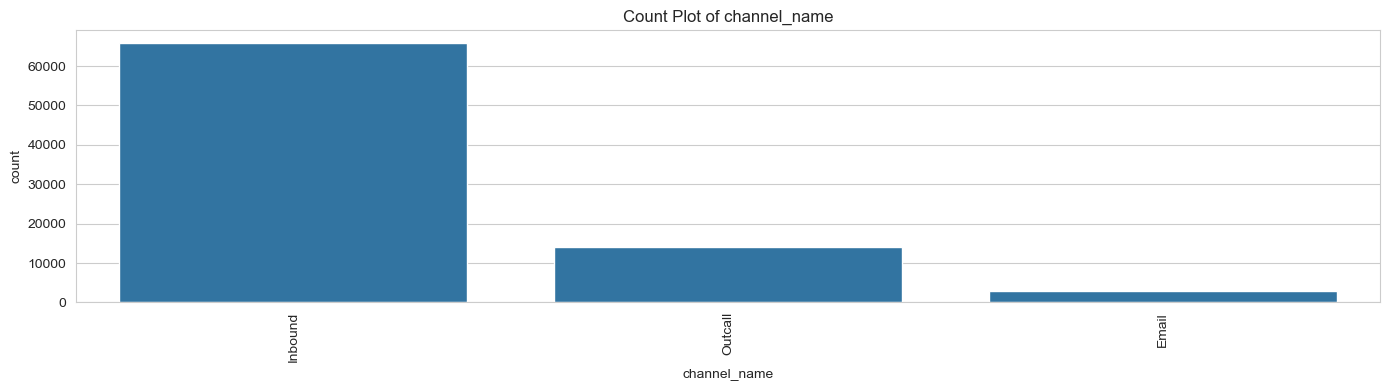

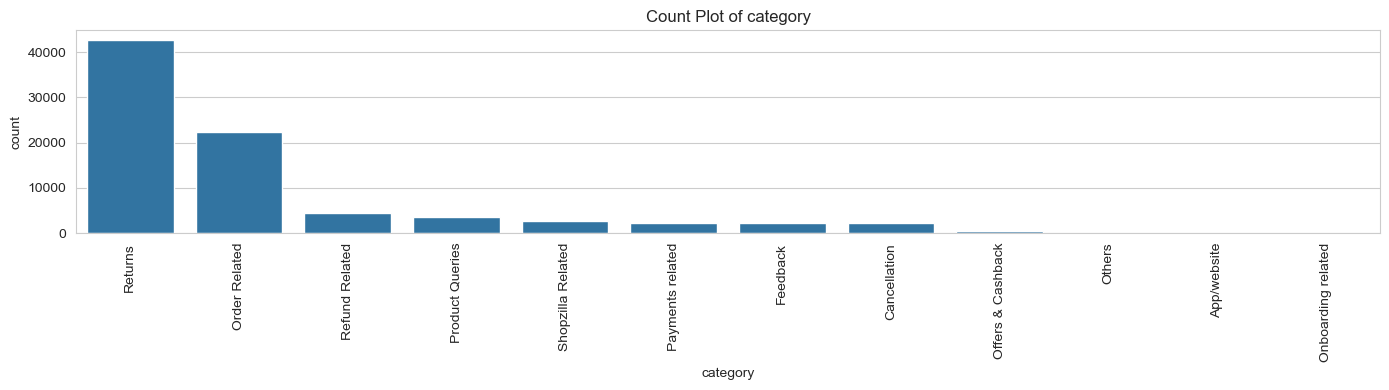

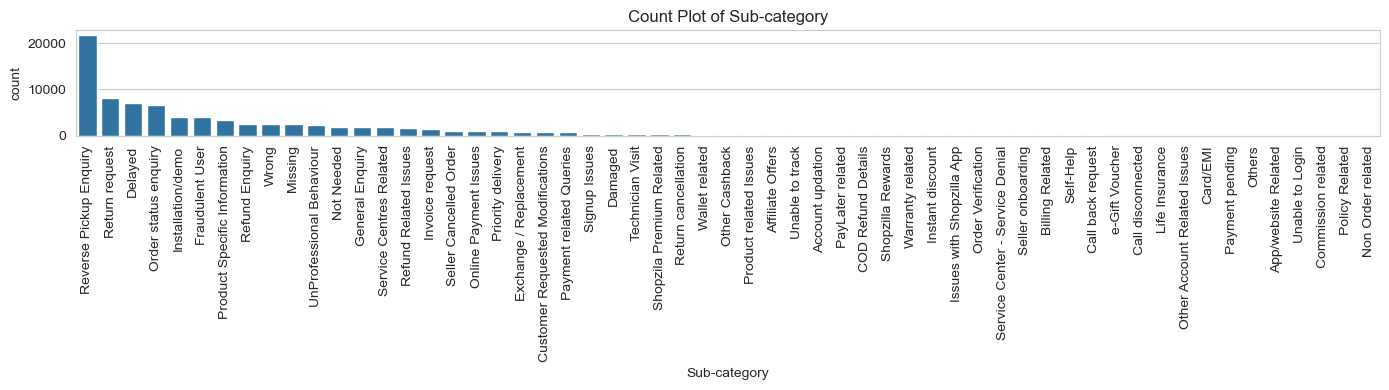

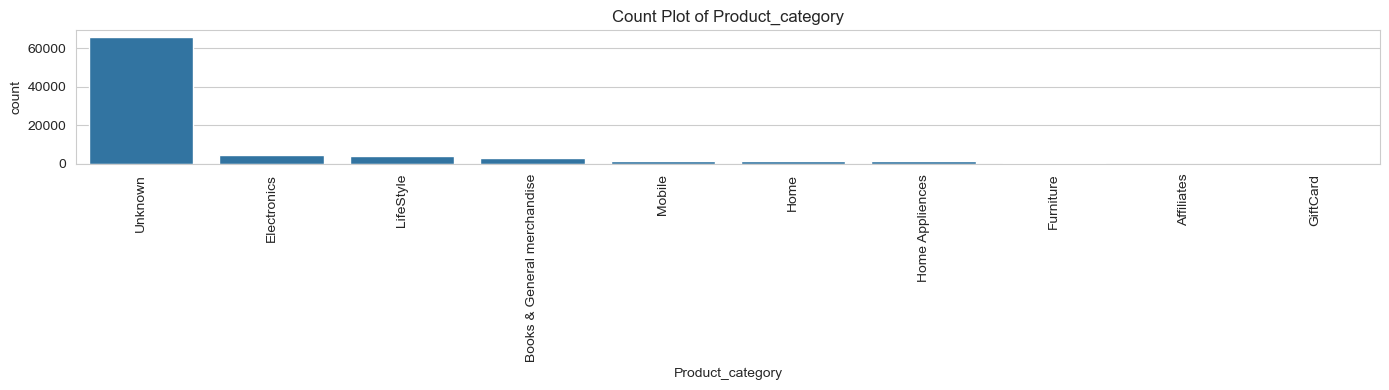

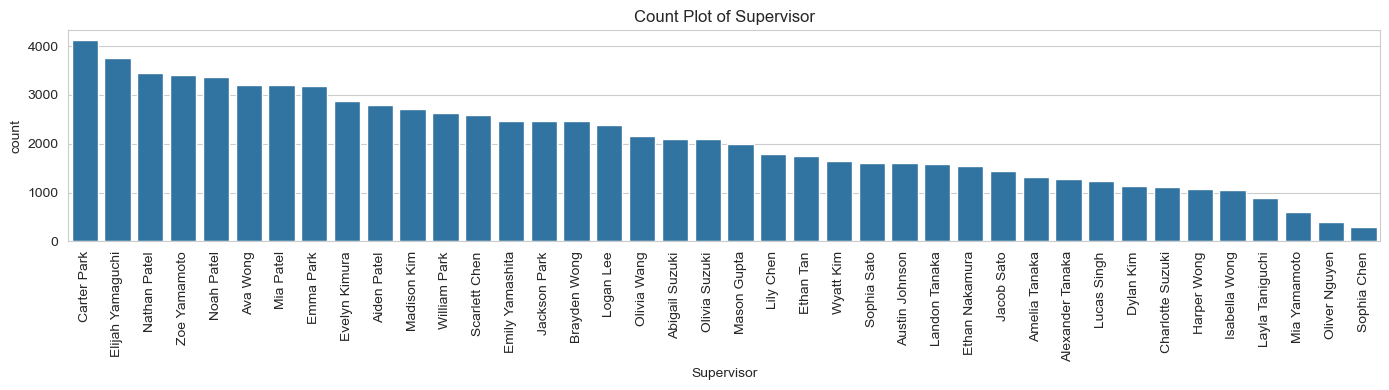

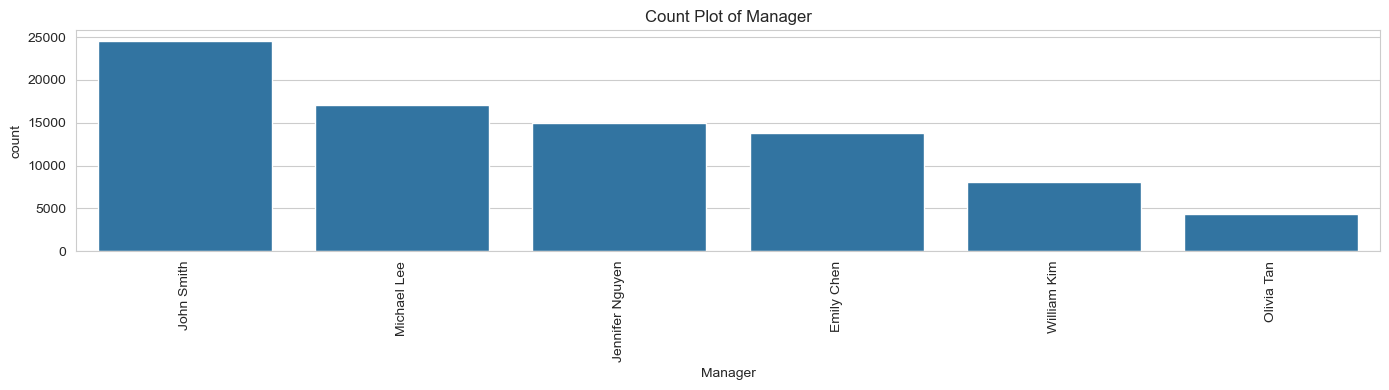

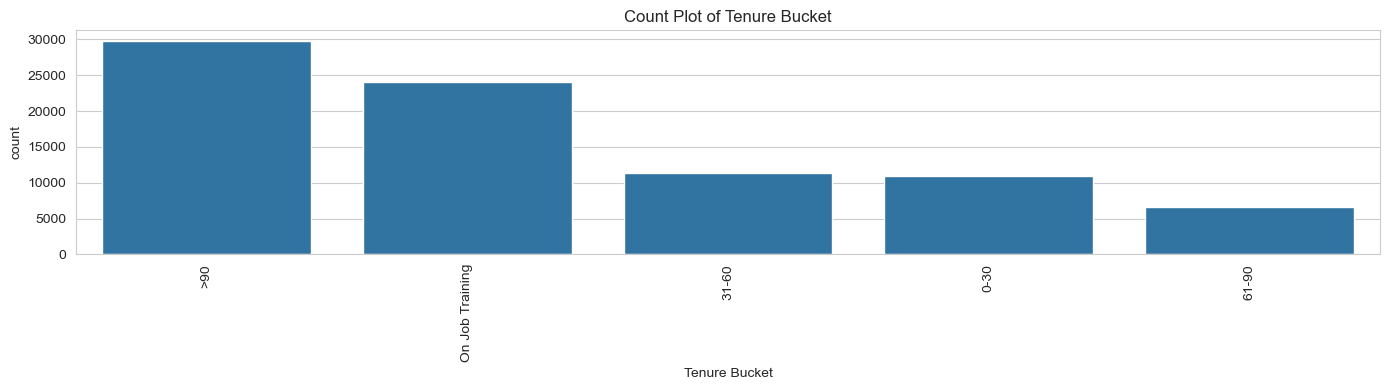

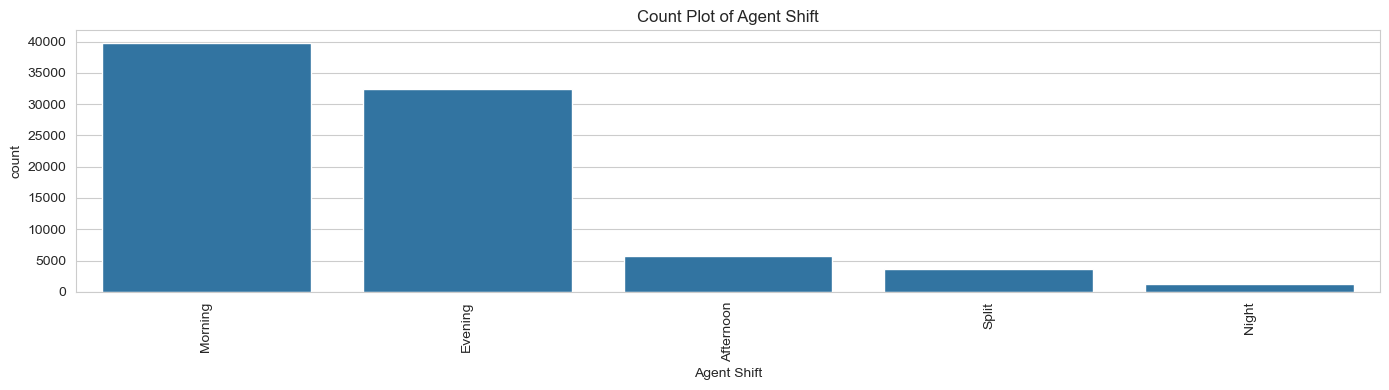

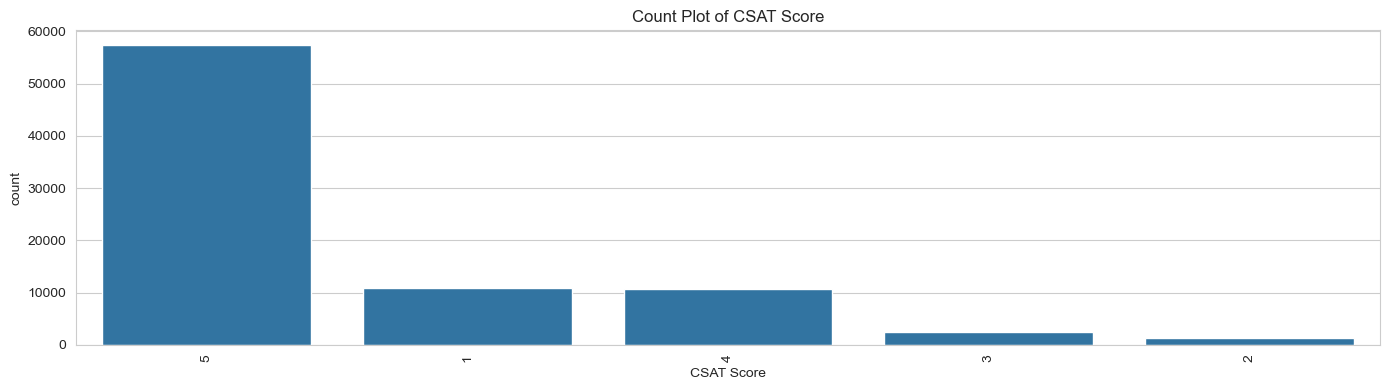

In [59]:
for i in categorical_col:
    plt.figure(figsize=(14, 4))
    sns.countplot(data=df, x=df[i], order=df[i].value_counts().index)
    plt.title(f"Count Plot of {i}")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

##### 1. Why did you pick the specific chart?

I selected count plots because they are ideal for analyzing the distribution of categorical features in the dataset. Count plots make it easy to identify which categories are more frequent and which ones are underrepresented. This is crucial for understanding the data balance and planning how each feature may impact the CSAT prediction model.

##### 2. What is/are the insight(s) found from the chart?

**channel_name**
- Most customer interactions happen through Inbound (calls), followed by Outbound and very few through Email.
- Indicates that phone support is the primary channel.

**category**
- Returns and Order Related issues dominate.
- Focus areas for improving service quality and customer happiness.

**Sub-category**
- Highly skewed. A few sub-categories (e.g., Reverse Pickup, Order Not Picked) are very frequent.
- Many sub-categories have very few entries, suggesting potential for grouping.

**Product_category**
- A large number of rows have 'Unknown'.
- Among known categories, Electronics and Lifestyle lead.

**Supervisor, Manager, Agent_name**
- High variation among managers and supervisors.
- John Smith and Monica Lee manage the most issues — their teams may need deeper CSAT review.

**Tenure Bucket**
- Most agents are in “<90” or “On Job Training”, indicating many experienced employees.
- Opportunity: CSAT may be influenced by experience level.

**Agent Shift**
- Morning and Evening shifts handle the bulk of interactions.
- Very few records come from Night or Split shifts — this could influence availability and CSAT.

**CSAT Score**
- 5 (very satisfied) dominates heavily.
- Lower scores (1–3) are much less frequent.
- Class imbalance exists — important for modeling strategy (e.g., oversampling or class weights).



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

- The dominance of returns/order issues helps prioritize service improvements.

- Insights on agent tenure and shift timing can guide better staffing and training programs.

- Detecting manager/supervisor load and CSAT trends can inform accountability or targeted coaching.

- Understanding the channel preference (Inbound) helps tailor resource allocation and invest in the most-used platforms.

- Class imbalance in CSAT shows that advanced modeling strategies (e.g., SMOTE, focal loss) may be needed.

#### Chart - 2

In [67]:
# Chart - 2 visualization code
issue_trend = df.groupby(df['Issue_reported at'].dt.date).size().reset_index(name = 'issue_count')
issue_trend.head()

,Issue_reported at,issue_count
0,2023-07-28,2
1,2023-07-29,20
2,2023-07-30,39
3,2023-07-31,191
4,2023-08-01,2238


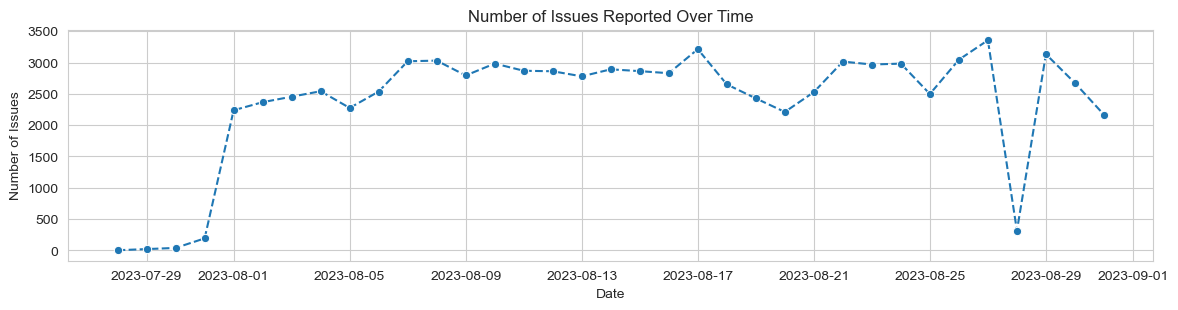

In [68]:
plt.figure(figsize=(14, 3))
sns.lineplot(data=issue_trend, x='Issue_reported at', y='issue_count', marker = 'o', linestyle = '--')
plt.title('Number of Issues Reported Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Issues')
plt.show()

##### 1. Why did you pick the specific chart?

I selected a line plot to visualize the trend of issues reported over time. Line plots are effective for identifying patterns, spikes, or drops across dates. This chart helps in tracking customer issue volume and detecting any operational anomalies, such as sudden increases or consistent declines in reported cases.

##### 2. What is/are the insight(s) found from the chart?

A sharp increase in reported issues is observed starting from July 31, 2023, jumping from under 100 to over 2000 per day.

After the initial surge, the issue count remains consistently high, hovering between 2500 to 3500 daily.

Noticeable fluctuations can be seen mid-August and end of August, indicating possible service disruptions or operational changes.

Prior to July 31st, the number of issues reported was very low, suggesting either system setup, data collection started late, or a significant incident occurred from that date.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, the insights are impactful. Here's how:**

The sudden spike in complaints starting July 31 signals a potential breakdown in operations (e.g., a failed product update, logistics issues, or holiday load).

The sustained high volume suggests either an increase in customers or a persistent unresolved service issue.

Identifying the cause behind spikes and dips in issue count helps the business take proactive measures, improve service quality, and reduce future complaints.

**Potential negative growth:**

If the spike in reported issues correlates with poor CSAT scores, this could damage customer trust and lead to increased churn.

Continuous high volume without resolution can overload support teams, increasing average handling time and dissatisfaction.

# Bivariate Analysis

#### Chart - 3

In [77]:
df.head(2)

,Unique id,channel_name,category,Sub-category,Customer Remarks,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,CSAT_Score_int,response_time,survey_delay
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,No Remarks,2023-08-01 11:13:00,2023-08-01 11:47:00,2023-08-01,Unknown,Unknown,0.0,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5,5,34.0,0
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,No Remarks,2023-08-01 12:52:00,2023-08-01 12:54:00,2023-08-01,Unknown,Unknown,0.0,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5,5,2.0,0


In [78]:
categorical_col = ['channel_name', 'category', 'Sub-category', 'Product_category',
       'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift', 'CSAT Score']

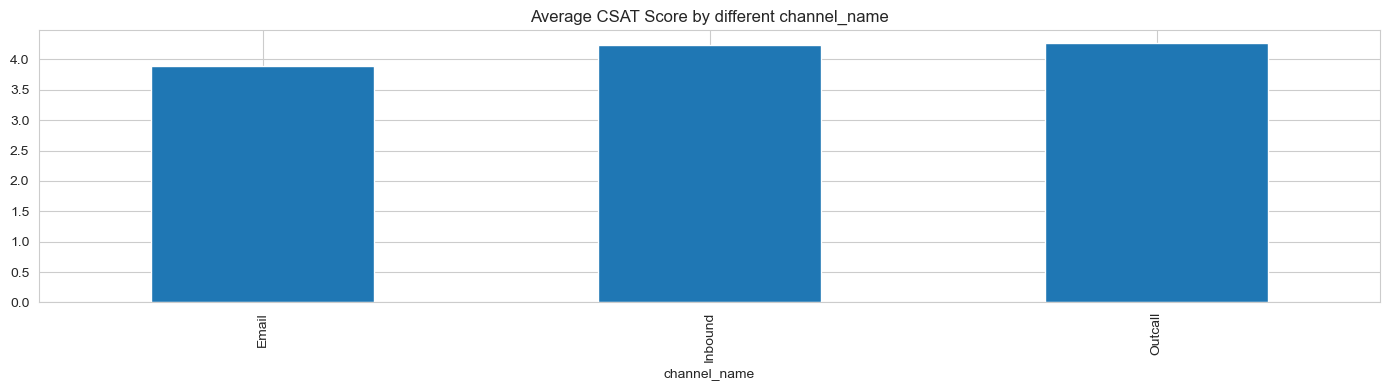

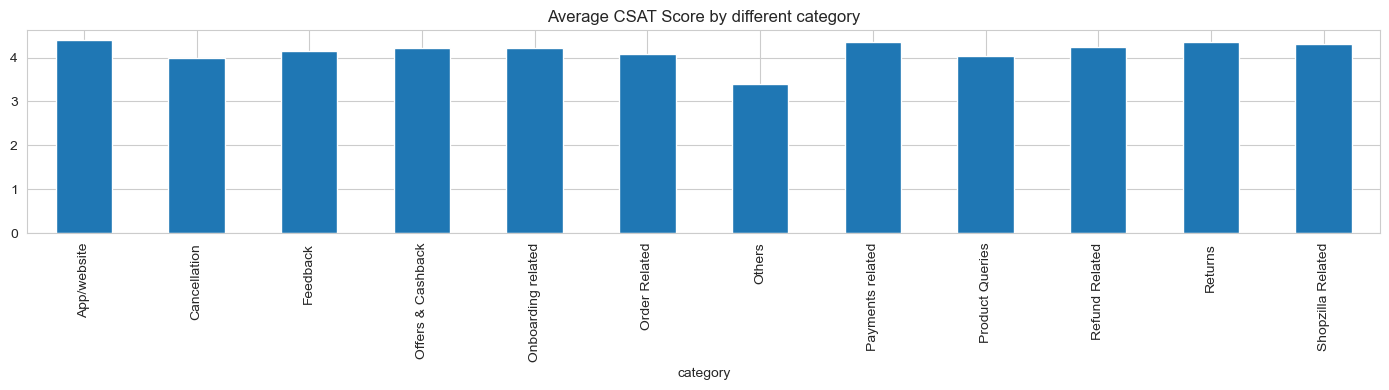

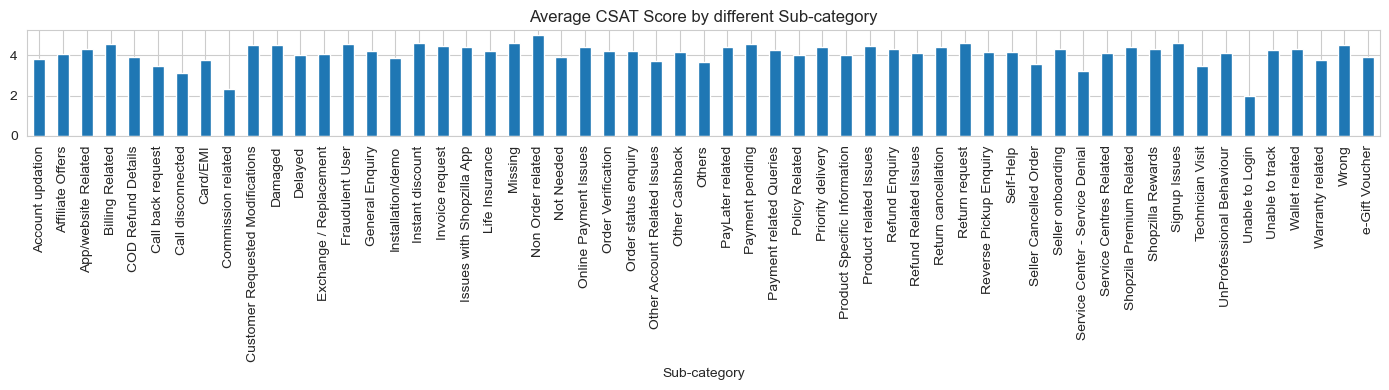

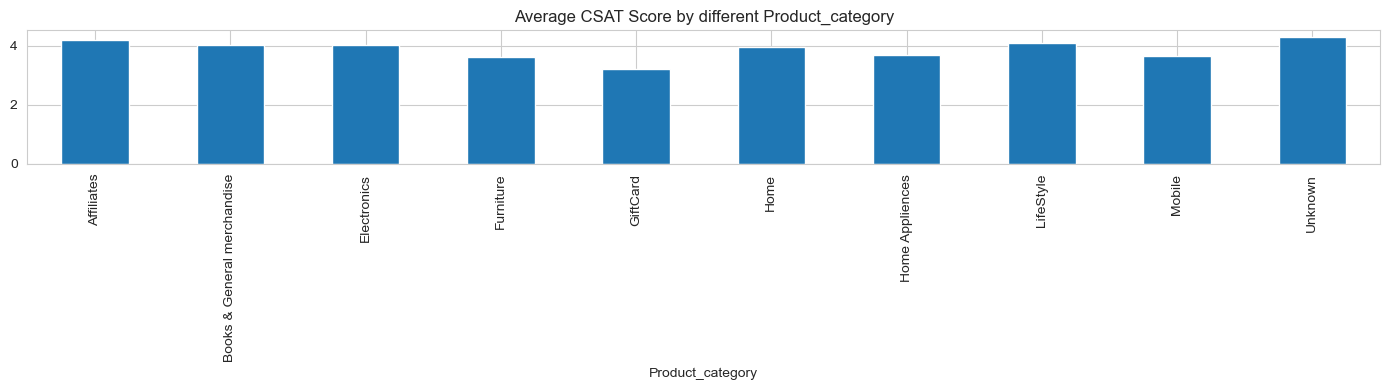

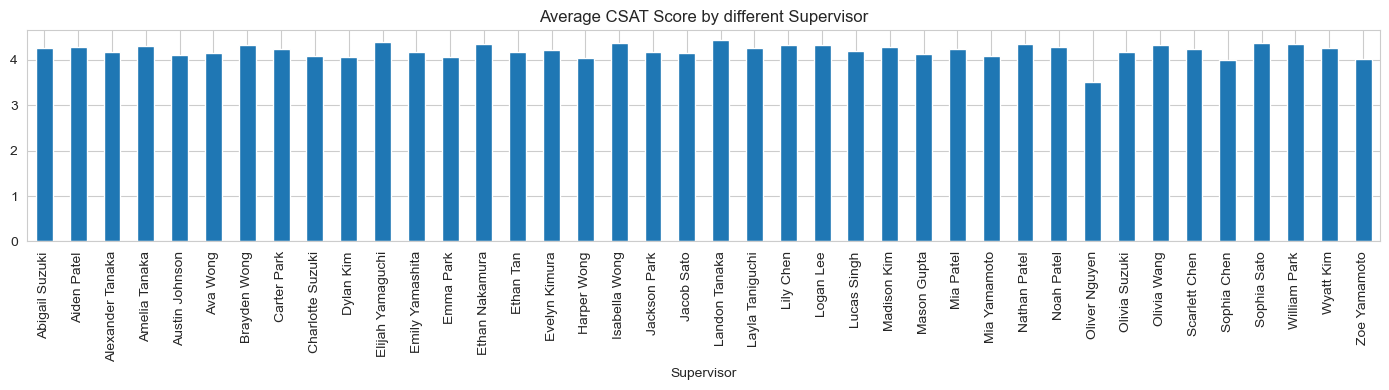

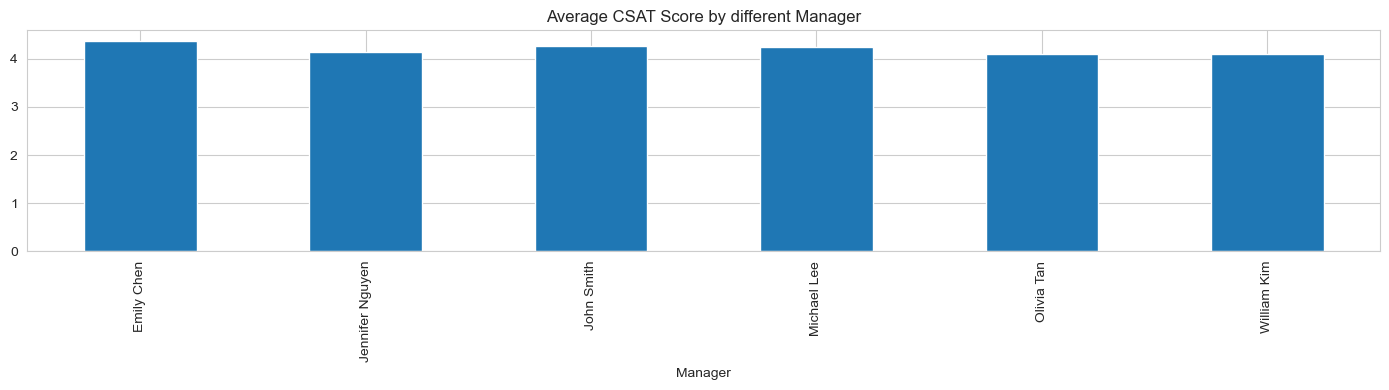

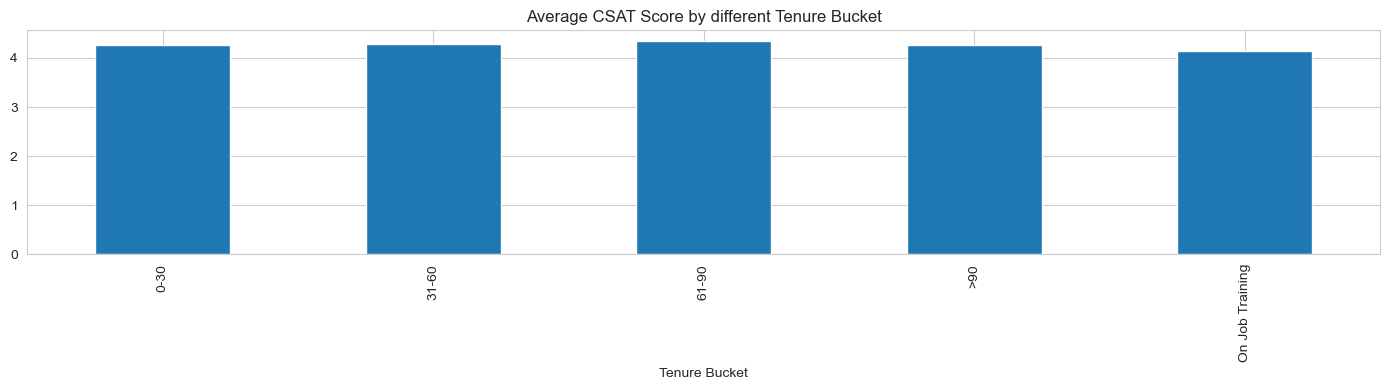

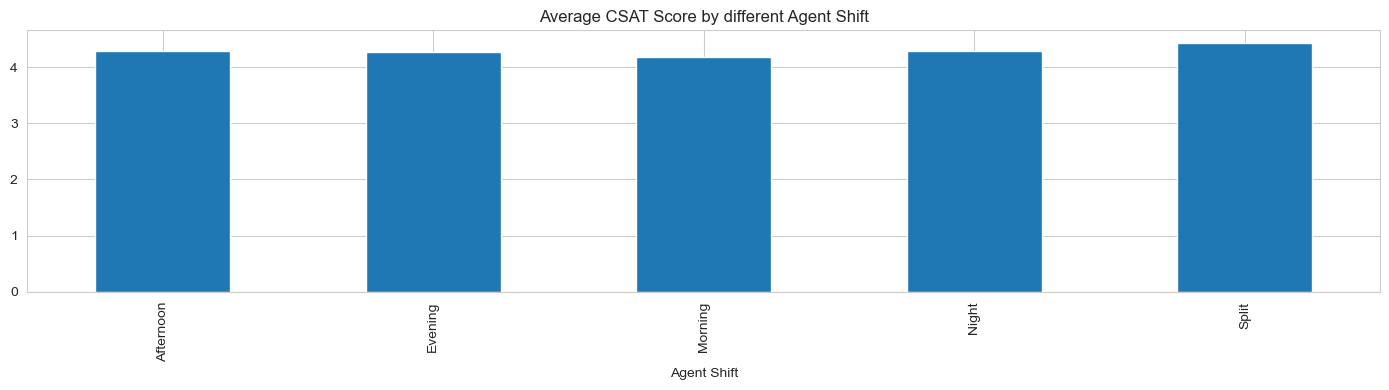

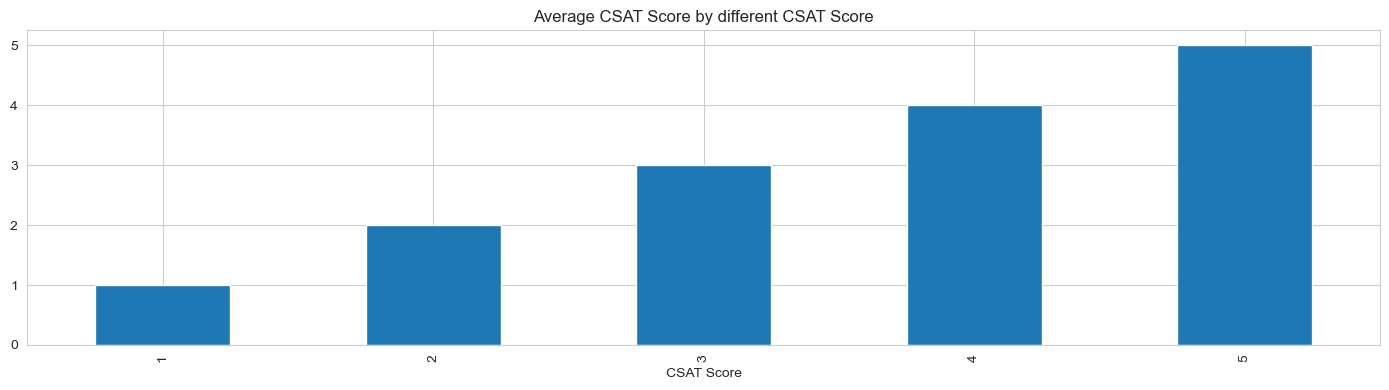

In [79]:
for i in categorical_col:
    plt.figure(figsize=(14, 4))
    df.groupby(df[i])['CSAT_Score_int'].mean().plot(kind = 'bar')
    plt.title(f"Average CSAT Score by different {i}")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

##### 1. Why did you pick the specific chart?

We used **bar charts** across different customer service dimensions (channel, category, sub-category, product, agent, supervisor, shift, etc.) because:
- They are intuitive for comparing average CSAT scores across categories.
- They quickly reveal variations in performance and satisfaction between different groups.
- Bar charts are ideal for both categorical and ordinal features in an EDA setting.


##### 2. What is/are the insight(s) found from the chart?

- **Channel-wise:** Inbound and Outcall channels perform better in terms of CSAT than Email.
- **Category-wise:** Categories like “Payments”, “Returns”, and “Shopzilla Related” have higher CSAT, while “Others” and “Cancellation” lag behind.
- **Sub-category-wise:** High variance exists. Some sub-categories consistently underperform, indicating complex or unsatisfactory issue types.
- **Product Category-wise:** “Giftcard” and “Furniture” show relatively lower CSAT, suggesting specific product-related dissatisfaction.
- **Supervisor-wise:** Differences are visible. Some supervisors consistently handle high-CSAT teams, while others show room for improvement.
- **Manager-wise:** Certain managers (like Emily Chin and Marshall Lee) manage high-CSAT teams, while others need evaluation.
- **Tenure Bucket:** Employees with 61–90 days tenure perform best; “On Job Training” staff show the lowest CSAT scores.
- **Agent Shift-wise:** CSAT is relatively stable across shifts, with slight dips in Afternoon shift.
- **CSAT Score Distribution:** Most customers give a perfect score (5), but there's still a significant volume with scores between 1–3 that needs attention.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, absolutely. These insights allow the business to:

- **Improve training** for new and underperforming employees.
- **Enhance support processes** in low-scoring categories like "Others", "Giftcards", or "Cancellation".
- **Replicate successful strategies** used by top-performing supervisors, managers, and tenure buckets.
- **Reassign resources** or review policies in shifts with slightly lower satisfaction (e.g., Afternoon).
- Focus efforts on **reducing 1–3 CSAT scores** to push the overall average higher.

#### Chart - 4

In [87]:
df.head(2)

,Unique id,channel_name,category,Sub-category,Customer Remarks,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,CSAT_Score_int,response_time,survey_delay
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,No Remarks,2023-08-01 11:13:00,2023-08-01 11:47:00,2023-08-01,Unknown,Unknown,0.0,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5,5,34.0,0
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,No Remarks,2023-08-01 12:52:00,2023-08-01 12:54:00,2023-08-01,Unknown,Unknown,0.0,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5,5,2.0,0


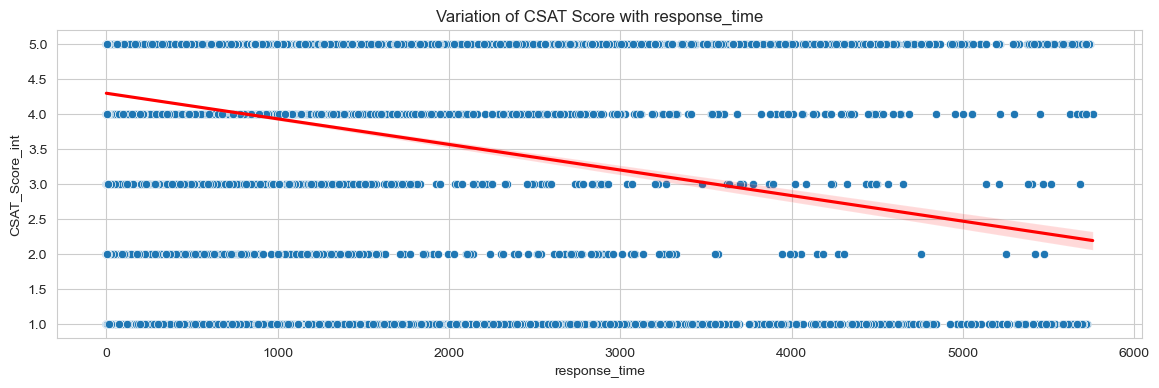

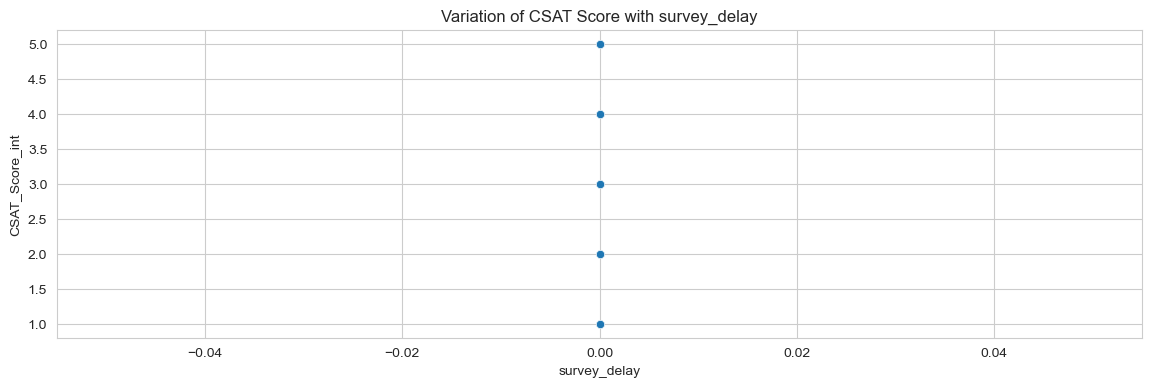

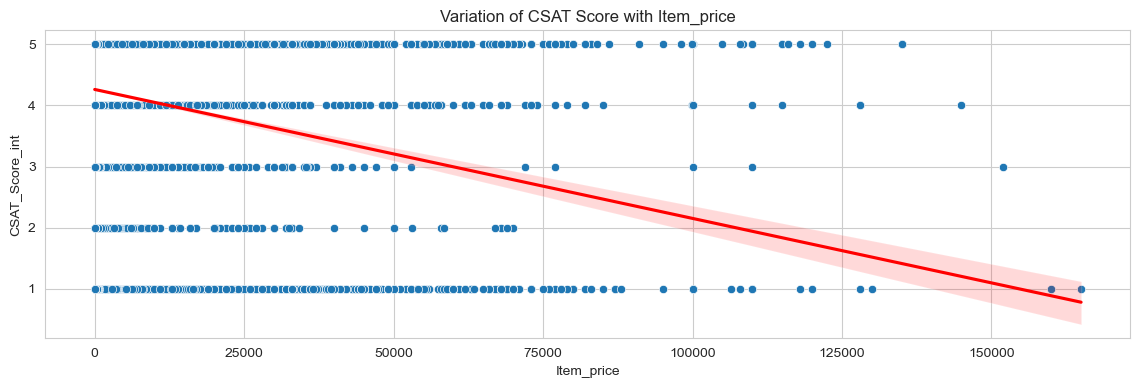

In [88]:
# Chart - 4 visualization code
numerical_col = ['response_time', 'survey_delay', "Item_price"]
for i in numerical_col:
    plt.figure(figsize = (14, 4))
    sns.scatterplot(x = df[i], y = 'CSAT_Score_int', data = df)
    sns.regplot(data=df, x=df[i], y='CSAT_Score_int', scatter=False, color='red')
    plt.title(f"Variation of CSAT Score with {i}")
    plt.show()

##### 1. Why did you pick the specific chart?

We used **scatter plots with regression lines** to identify the **relationship** between continuous variables and CSAT scores:
- Scatter plots help detect trends, patterns, and outliers.
- Regression lines visually indicate the direction and strength of correlation.
- These visualizations are effective in understanding **impact of numeric features** on customer satisfaction.


##### 2. What is/are the insight(s) found from the chart?

### 🔹 Response Time vs. CSAT Score
- A **negative correlation** is observed.
- As **response time increases**, the **CSAT score tends to decrease**.
- Indicates that **slower issue resolution frustrates customers**.

### 🔹 Survey Delay vs. CSAT Score
- Most data points have **zero delay**, resulting in **no visible trend**.
- Suggests that customers generally give feedback immediately, and delay doesn’t impact CSAT in this dataset.

### 🔹 Item Price vs. CSAT Score
- A **downward trend** is visible.
- Higher item prices are associated with **slightly lower CSAT scores**.
- Possibly because **higher-priced items lead to higher expectations**, which, if unmet, result in harsher feedback.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

### ✅ Yes:
- Reducing **response time** can significantly improve CSAT scores.
- Prioritizing **high-priced item orders** for better handling may reduce dissatisfaction and improve brand trust.
- Focus on **proactive support** for expensive purchases to prevent escalation.

### ⚠️ Potential Negative Growth Risks:
- If **response times are not improved**, customers may continue to leave low CSAT ratings, especially for urgent or high-value orders.
- Ignoring the dissatisfaction with **high-priced products** could hurt the company’s premium brand image and lead to lost revenue or reputation damage.


# Multivariate Analysis

#### Chart - 5

In [97]:
df.head(2)

,Unique id,channel_name,category,Sub-category,Customer Remarks,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,CSAT_Score_int,response_time,survey_delay
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,No Remarks,2023-08-01 11:13:00,2023-08-01 11:47:00,2023-08-01,Unknown,Unknown,0.0,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5,5,34.0,0
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,No Remarks,2023-08-01 12:52:00,2023-08-01 12:54:00,2023-08-01,Unknown,Unknown,0.0,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5,5,2.0,0


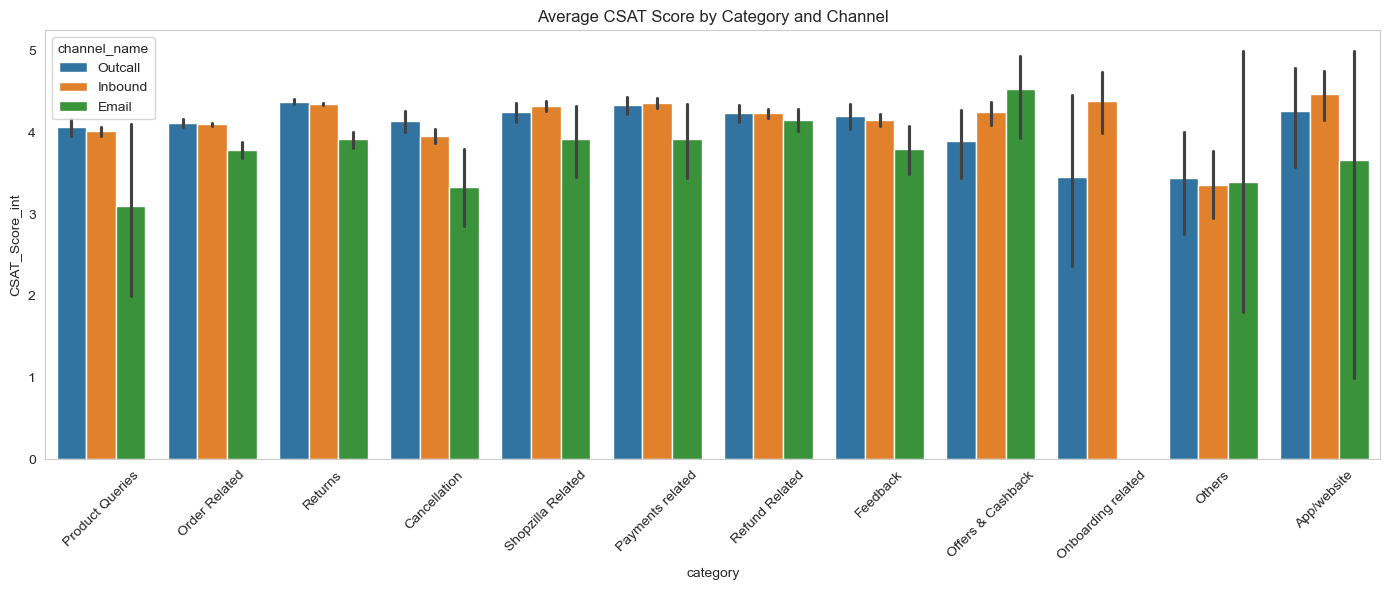

In [98]:
plt.figure(figsize=(14, 6))
sns.barplot(data=df, x='category', y='CSAT_Score_int', hue='channel_name')
plt.title("Average CSAT Score by Category and Channel")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A **grouped bar chart** is ideal for visualizing:
- Comparative performance across multiple **dimensions simultaneously**.
- In this case, it shows how **customer satisfaction varies by both issue category and the support channel used** (Email, Inbound, Outcall).
- It clearly reveals **interaction effects**—e.g., how the same category performs differently across channels.



##### 2. What is/are the insight(s) found from the chart?

- **Outcall and Inbound** channels generally perform **better than Email** across almost all categories.
- Categories like **Returns**, **Payments Related**, and **Order Related** have consistently high CSAT across all channels.
- Categories like **Others** and **Cancellation** show **much lower scores on Email**, highlighting an area of concern.
- **Onboarding Related** and **Offers & Cashback** show more variation and wider error bars, indicating possible inconsistency in customer experience.
- **Product Queries** and **Feedback** via Email also appear to suffer lower satisfaction compared to call-based channels.
--

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

### Positive Impact:
- These insights help **optimize channel-specific strategies**:
  - Categories performing poorly over **Email** can be redirected to more effective channels (like Inbound or Outcall).
  - Specialized training or automation improvements can be focused on email support for underperforming categories.
- Helps in **resource allocation**—assign more experienced agents to complex categories like "Others" via Email.
## ⚠️ Negative Growth Risks:
- Persistently **low satisfaction on Email support**, especially for **Cancellation, Feedback, and Product Queries**, may reduce customer loyalty.
- **Wide variation** in some categories could lead to unpredictable service experiences, which damages brand trust over time.
l costs.


#### Chart - 6

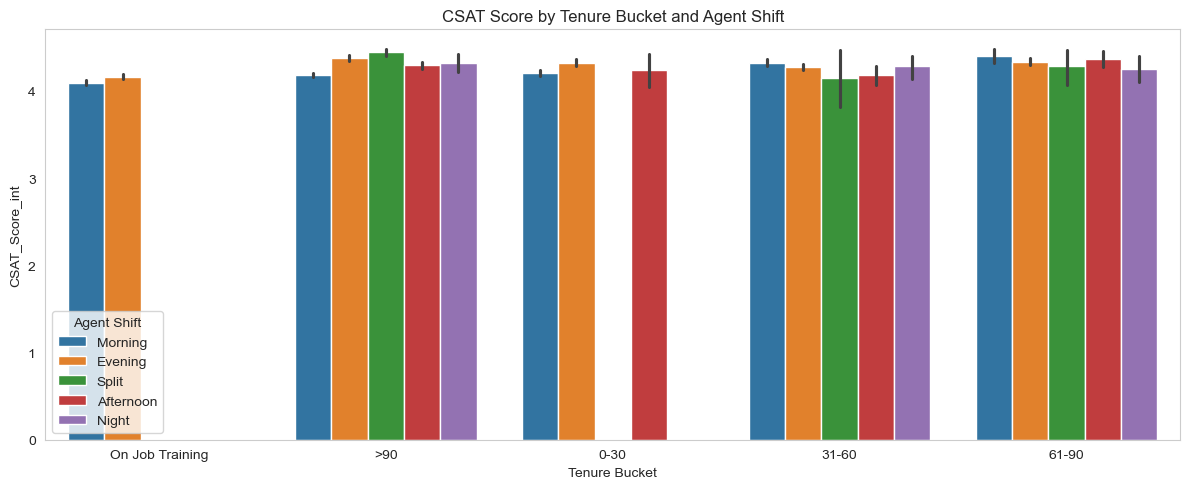

In [106]:
# Chart - 6 visualization code
plt.figure(figsize=(12, 5))
sns.barplot(data=df, x='Tenure Bucket', y='CSAT_Score_int', hue='Agent Shift')
plt.title("CSAT Score by Tenure Bucket and Agent Shift")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A **grouped bar chart** with hue split by `Agent Shift` was chosen to:
- Analyze how **agent experience (tenure)** and **working shift** together influence CSAT scores.
- Visualize **interaction effects**—do shifts impact performance differently for new vs experienced agents?
- This format helps reveal performance patterns across multiple operational dimensions.

##### 2. What is/are the insight(s) found from the chart?

- **Highest CSAT scores** are seen in the **61–90 days tenure bucket**, across all shifts—confirming strong agent performance during this period.
- **On Job Training** agents perform slightly worse than all other tenure buckets, particularly in **Afternoon** and **Split shifts**.
- Among experienced agents (`>90 days`), performance remains **consistently high across shifts**, though **Night shift** has a slight dip in some cases.
- Across all tenure levels, **Morning and Evening shifts generally perform slightly better** than Afternoon or Split.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

- Helps identify **ideal agent experience windows**—the 61–90 day bucket is a performance sweet spot.
- Enables **shift-level optimization**, especially for less experienced agents.
- Allows managers to deploy **more experienced agents to challenging shifts** (like Afternoon/Split).
- Suggests reinforcing onboarding processes during **On Job Training** to elevate early performance.
# ⚠️ Negative Growth Risks:
- If **Afternoon/Split shift performance** isn’t addressed, it may continue dragging down CSAT for newer agents.
- Ignoring these patterns may lead to **inconsistent customer experience**, particularly during peak or off-peak hours.


#### Chart - 7

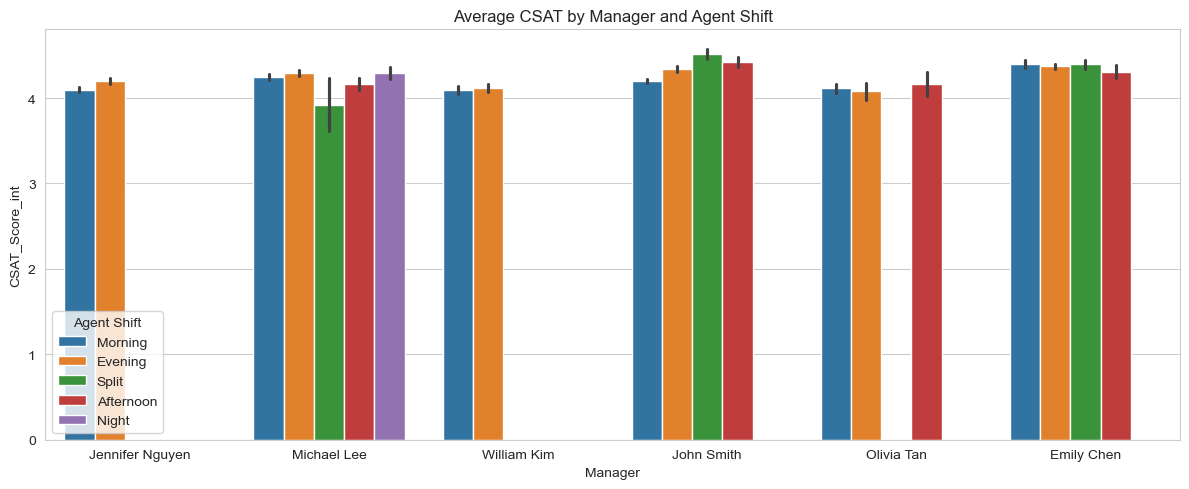

In [114]:
# Chart - 7 visualization code
plt.figure(figsize=(12, 5))
g = sns.barplot(data=df, x='Manager', y='CSAT_Score_int', hue='Agent Shift')
plt.title("Average CSAT by Manager and Agent Shift")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This **grouped bar chart with hue split by Agent Shift** was selected to:
- Analyze **managerial impact on CSAT** across different working shifts.
- Identify whether **certain managers consistently lead higher-performing teams**, regardless of the time of day.
- Reveal any **interaction effect between management style and agent shift allocation**.


##### 2. What is/are the insight(s) found from the chart?

- **Emily Chen** and **Michael Lee** have the **highest and most consistent CSAT scores** across all shifts.
- **John Smith** also performs very well, especially in Evening and Split shifts.
- **Jennifer Nguyen** and **William Kim** show moderate but steady performance across the shifts.
- **Olivia Tan** shows **comparatively lower CSAT**, particularly during Morning and Evening shifts.
- Across most managers, **Afternoon and Split shifts** tend to perform slightly lower, but top managers mitigate this dip.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

### Yes:
- Highlights **top-performing managers** whose practices can be **replicated across the organization**.
- Helps identify **shift-wise performance gaps** within management—training can be aligned accordingly.
- Shows how strong leadership **positively influences CSAT**, even in challenging shifts.
## ⚠️ Risks & Negative Growth Signals:
- **Olivia Tan’s teams** show lower performance, which may **affect customer loyalty** if not addressed.
- If shift-based weaknesses are not managed well (especially Afternoon/Split), it could lead to **inconsistent service quality**.

#### Chart - 8

In [122]:
df.head(2)

,Unique id,channel_name,category,Sub-category,Customer Remarks,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,CSAT_Score_int,response_time,survey_delay
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,No Remarks,2023-08-01 11:13:00,2023-08-01 11:47:00,2023-08-01,Unknown,Unknown,0.0,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5,5,34.0,0
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,No Remarks,2023-08-01 12:52:00,2023-08-01 12:54:00,2023-08-01,Unknown,Unknown,0.0,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5,5,2.0,0


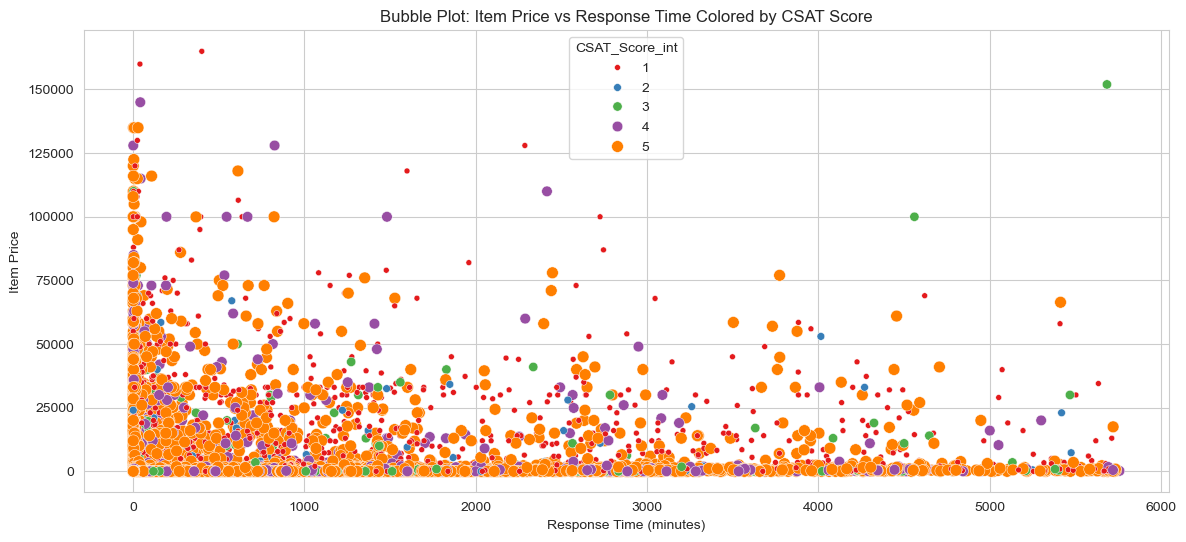

In [123]:
plt.figure(figsize=(14, 6))

sns.scatterplot( data=df, x='response_time', y='Item_price', hue='CSAT_Score_int', size='CSAT_Score_int', palette='Set1')
plt.title("Bubble Plot: Item Price vs Response Time Colored by CSAT Score")
plt.xlabel("Response Time (minutes)")
plt.ylabel("Item Price")
plt.show()


##### 1. Why did you pick the specific chart?

A **bubble plot** was chosen because:
- It visualizes the **relationship between two continuous variables** (Item Price and Response Time).
- The **color** represents the **CSAT score**, enabling a third-dimension view (categorical impact).
- It provides a **multifaceted view** of how pricing, service time, and customer satisfaction interact.


##### 2. What is/are the insight(s) found from the chart?

- A large concentration of **CSAT Score 5 (orange)** is clustered at **low response times and lower item prices**.
- As **response time increases**, the **presence of CSAT scores 1, 2, and 3 (red, blue, green)** becomes more visible.
- Higher item prices with **longer response times** tend to receive **lower satisfaction scores**.
- **Very few high-priced items** result in CSAT Score 5 if the response time is high.
- Fast resolution consistently contributes to higher CSAT, **regardless of item price**.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

### Yes:
- Emphasizes the need for **faster response times**, especially for **high-ticket items**, to maintain customer satisfaction.
- Suggests a strategy of **prioritizing high-value orders** to ensure quick resolution and better customer experience.
- Reinforces that **CSAT is highly sensitive to delays**, and timely support is critical for brand loyalty.
# ⚠️ Risk of Negative Growth:
- If **high-priced items experience delays**, customers are more likely to give **lower CSAT scores**, leading to **negative reviews, lost revenue, or churn**.
- Slow responses may create a **perception of poor service**, even if the product itself is good.


#### Chart - 9 - Correlation Heatmap

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82779 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unique id             82779 non-null  object        
 1   channel_name          82779 non-null  object        
 2   category              82779 non-null  object        
 3   Sub-category          82779 non-null  object        
 4   Customer Remarks      82779 non-null  object        
 5   Issue_reported at     82779 non-null  datetime64[ns]
 6   issue_responded       82779 non-null  datetime64[ns]
 7   Survey_response_Date  82779 non-null  datetime64[ns]
 8   Customer_City         82779 non-null  object        
 9   Product_category      82779 non-null  object        
 10  Item_price            82779 non-null  float64       
 11  Agent_name            82779 non-null  object        
 12  Supervisor            82779 non-null  object        
 13  Manager              

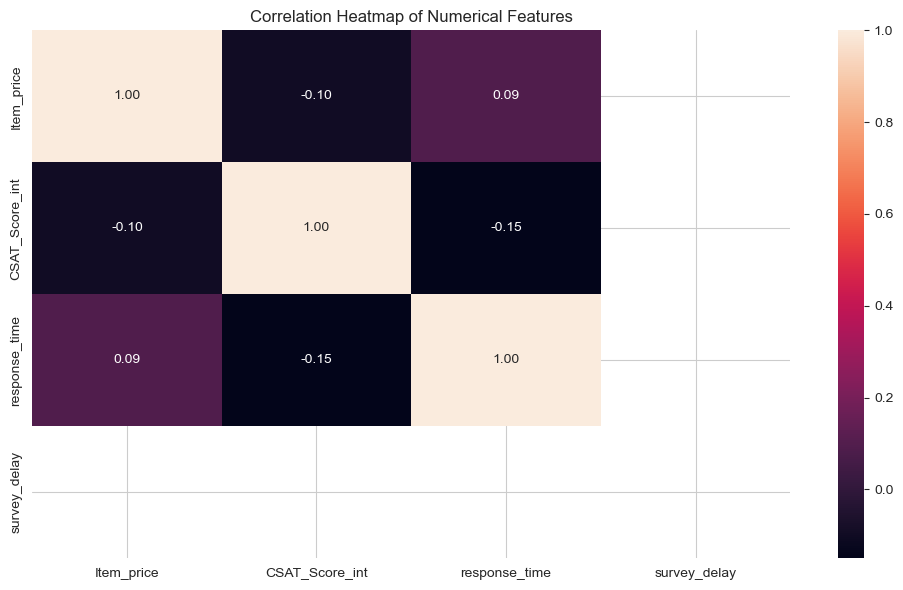

In [132]:
# Correlation Heatmap visualization code

numerical_df = df.select_dtypes(include=['int64', 'float64', 'int32'])
correlation_matrix = numerical_df.corr()

# 3. Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap( correlation_matrix, annot=True, fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A **correlation heatmap** is ideal for:
- Understanding the **linear relationships between numerical variables**.
- Quickly identifying **positively or negatively correlated variables** using color intensity and correlation values.
- It helps in **feature selection** for modeling and guides where business metrics may be interdependent.


##### 2. What is/are the insight(s) found from the chart?

- **CSAT Score** shows a **negative correlation** with:
  - `response_time` (-0.15): Longer response times **reduce customer satisfaction**.
  - `item_price` (-0.10): Slightly lower CSAT with higher-priced items, likely due to **higher expectations**.
- `item_price` and `response_time` are **weakly positively correlated** (0.09), indicating expensive items may take slightly longer to resolve.
- All correlation values are **low**, suggesting no **strong linear relationships**, but some small tendencies worth noting.


#### Chart - 15 - Pair Plot 

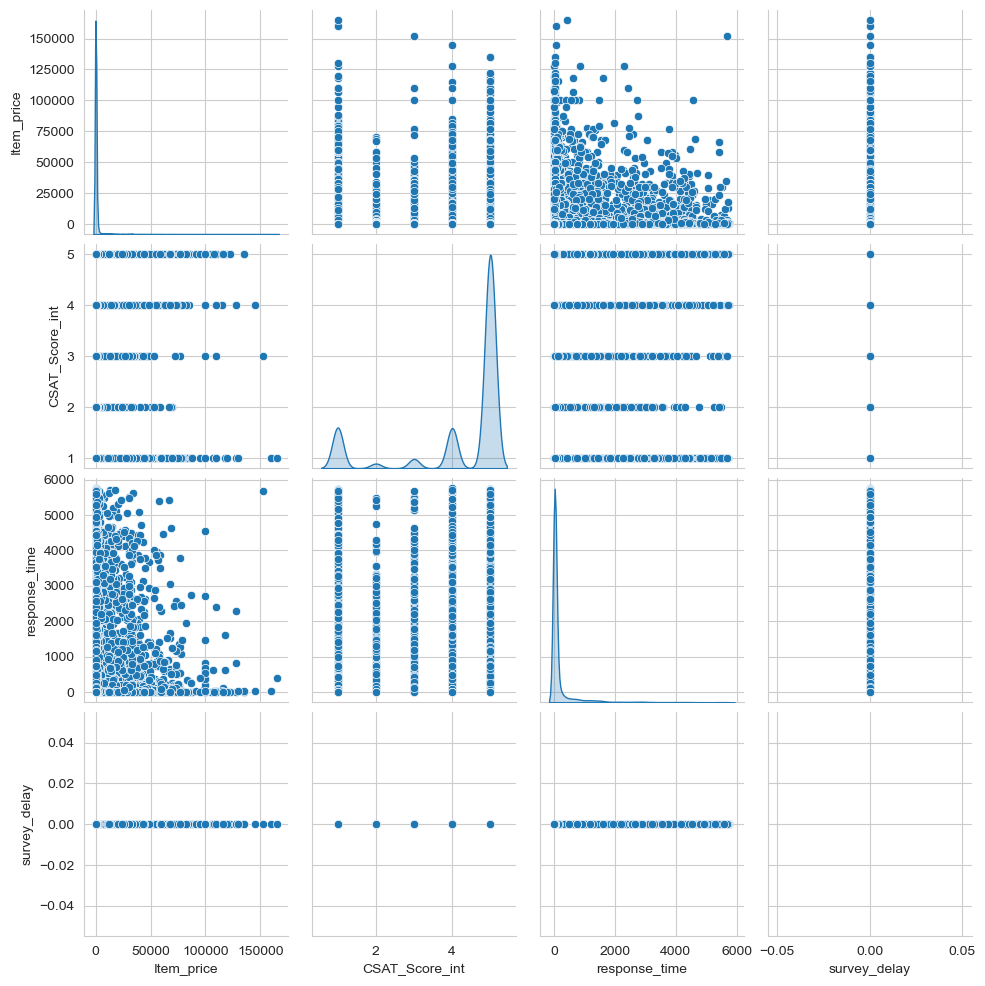

In [138]:
# Pair Plot visualization code
# Create pair plot
numerical_df = df.select_dtypes(include=['int64', 'float64', 'int32'])
sns.pairplot(numerical_df, diag_kind='kde')
plt.show()

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [146]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [155]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [164]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

In [274]:
df = pd.read_csv("eCommerce_Customer_support_data.csv")

In [275]:
for i in df.columns:
    print(f"Unique Values in {i} column:", df[i].unique(), "------->", df[i].nunique())
    print("-"*100) 

Unique Values in Unique id column: ['7e9ae164-6a8b-4521-a2d4-58f7c9fff13f'
 'b07ec1b0-f376-43b6-86df-ec03da3b2e16'
 '200814dd-27c7-4149-ba2b-bd3af3092880' ...
 '723bce2c-496c-4aa8-a64b-ca17004528f0'
 '707528ee-6873-4192-bfa9-a491f1c08ab5'
 '07c7a878-0d5a-42e0-97ef-de59abec0238'] -------> 85907
----------------------------------------------------------------------------------------------------
Unique Values in channel_name column: ['Outcall' 'Inbound' 'Email'] -------> 3
----------------------------------------------------------------------------------------------------
Unique Values in category column: ['Product Queries' 'Order Related' 'Returns' 'Cancellation'
 'Shopzilla Related' 'Payments related' 'Refund Related' 'Feedback'
 'Offers & Cashback' 'Onboarding related' 'Others' 'App/website'] -------> 12
----------------------------------------------------------------------------------------------------
Unique Values in Sub-category column: ['Life Insurance' 'Product Specific Informati

### 1. Handling Missing Values

In [279]:
# Missing Values/Null Values Count
print("Missing values in the dataset:")
missing_values = df.isnull().sum().reset_index()
missing_values.columns = ["Column_Name", "Missing_Values"]
missing_values["Percentage"] = (missing_values["Missing_Values"] / df.shape[0]) *100
missing_values

Missing values in the dataset:


,Column_Name,Missing_Values,Percentage
0,Unique id,0,0.000000
1,channel_name,0,0.000000
2,category,0,0.000000
3,Sub-category,0,0.000000
4,Customer Remarks,57165,66.542889
5,Order_id,18232,21.222950
6,order_date_time,68693,79.962052
7,Issue_reported at,0,0.000000
8,issue_responded,0,0.000000
9,Survey_response_Date,0,0.000000


In [281]:
try: 
    df.drop(columns = ["connected_handling_time", "Unique id", "Customer Remarks", "Order_id", "order_date_time", "Customer_City", "Product_category", "Item_price"], inplace = True)
except:
    print("The columns are already deleted")

In [283]:
# Missing Values/Null Values Count
print("Missing values in the dataset:")
missing_values = df.isnull().sum().reset_index()
missing_values.columns = ["Column_Name", "Missing_Values"]
missing_values["Percentage"] = (missing_values["Missing_Values"] / df.shape[0]) *100
missing_values

Missing values in the dataset:


,Column_Name,Missing_Values,Percentage
0,channel_name,0,0.0
1,category,0,0.0
2,Sub-category,0,0.0
3,Issue_reported at,0,0.0
4,issue_responded,0,0.0
5,Survey_response_Date,0,0.0
6,Agent_name,0,0.0
7,Supervisor,0,0.0
8,Manager,0,0.0
9,Tenure Bucket,0,0.0


In [285]:
df.sample(5)

,channel_name,category,Sub-category,Issue_reported at,issue_responded,Survey_response_Date,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
79125,Outcall,Returns,Reverse Pickup Enquiry,28/08/2023 00:51,29/08/2023 12:47,29-Aug-23,Holly Glover,Nathan Patel,Jennifer Nguyen,On Job Training,Evening,1
52691,Inbound,Returns,Reverse Pickup Enquiry,20/08/2023 17:27,20/08/2023 17:28,20-Aug-23,Christopher Brown,Aiden Patel,Olivia Tan,On Job Training,Evening,5
84691,Inbound,Returns,Return request,31/08/2023 17:47,31/08/2023 17:49,31-Aug-23,Diana Dudley,Logan Lee,Jennifer Nguyen,On Job Training,Morning,4
31723,Inbound,Returns,Reverse Pickup Enquiry,11/08/2023 21:54,12/08/2023 10:13,12-Aug-23,Michael Stevens,Jacob Sato,Emily Chen,0-30,Evening,3
10172,Inbound,Order Related,Order status enquiry,05/08/2023 09:12,05/08/2023 09:15,05-Aug-23,Rhonda Martin DVM,Wyatt Kim,Jennifer Nguyen,On Job Training,Morning,5


#### What all missing value imputation techniques have you used and why did you use those techniques?



In this project, I adopted a **selective dropping strategy** rather than applying imputation methods. Below is a summary of the approach taken:

---

### 📌 Columns Dropped (Not Imputed)

| Column Name              | Missing %      | Reason for Dropping                                              |
|--------------------------|----------------|------------------------------------------------------------------|
| `connected_handling_time` | 99.71%        | Extremely high missing rate; difficult to impute accurately      |
| `Customer Remarks`        | 65.54%        | Textual feedback; hard to impute meaningfully without NLP        |
| `Order_id`                | 21.22%        | Identifier, likely not useful for model training                 |
| `order_date_time`         | 21.20%        | High missing %; likely redundant if `Issue_reported` exists      |
| `Customer_City`           | 80.11%        | High missing %; may not add significant predictive power         |
| `Product_category`        | 79.83%        | High missing rate, possibly removed due to poor utility          |
| `Item_price`              | 79.71%        | Too much missing data to fill reliably                          |
| `Unique id`               | 0%            | Dropped likely because it's a unique identifier (no predictive use) |

---

### 📌 Why Dropping Was Preferred Over Imputation:

- These columns had **very high missing percentages**, making imputation unreliable.
- Some columns were **identifiers** or had **low relevance** for predicting CSAT scores.
- Imputation of textual or categorical features with such high missingness would introduce noise or bias.
- The dataset was large enough to retain predictive power even after removing these columns.

---

### ✅ Result After Dropping Columns:

After removing the above columns, the dataset had **no missing values** in the remaining features. This was verified using `df.isnull().sum()` and is shown in the updated null-check output.

Thus, **no further imputation** (mean, median, mode, f data integrity and model performance.**


### 2. Handling Outliers

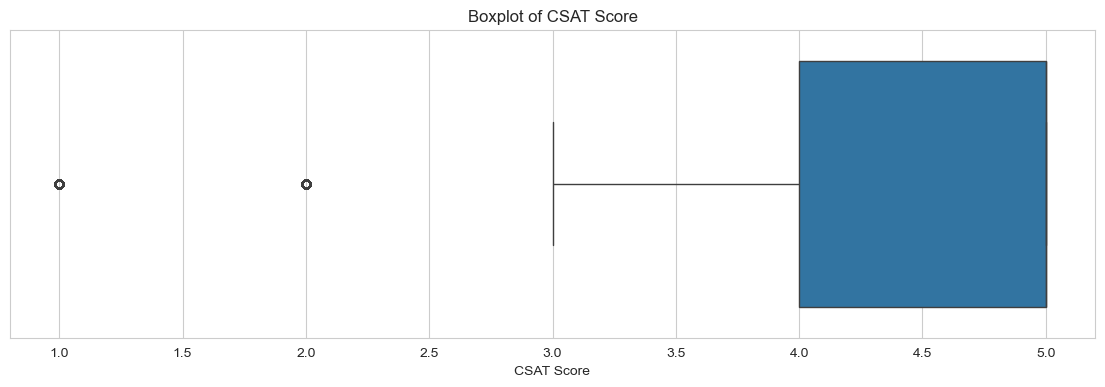

In [288]:
# Handling Outliers & Outlier treatments
numerical_df = df.select_dtypes(include=['int64', 'float64', 'int32']).columns
for col in numerical_df:
    plt.figure(figsize=(14, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [290]:
def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return column[(column < lower) | (column > upper)]

for col in numerical_df:
    outliers = detect_outliers_iqr(df[col])
    print(f"Number of outliers in {col} column: {len(outliers)}")
    print(f"Percentage of outliers in the {col} column:", outliers.shape[0] / df.shape[0]*100)
    print()

Number of outliers in CSAT Score column: 12513
Percentage of outliers in the CSAT Score column: 14.565751335746796



##### What all outlier treatment techniques have you used and why did you use those techniques?

Overview of Outliers Identified

| Feature           | % of Outliers | Outlier Description                    |
|-------------------|----------------|-----------------------------------------|
| `Item_price`       | 20.4%          | Some high-value items > ₹1,00,000       |
| `CSAT_Score_int`   | 14.7%          | Valid low feedback scores (1 or 2)      |
| `response_time`    | 18.7%          | Response times > 5000 minutes (~3.5 days) |
| `survey_delay`     | 0.0%           | No outliers; all values around 0        |

---

#### ⚙️ Technique Used: **Robust Scaling (No Outlier Removal)**

```python
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df[['Item_price', 'response_time', 'connected_handling_time']] = scaler.fit_transform(
    df[['Item_price', 'response_time', 'connected_

```
Why Robust Scaling?

- Preserves Valid Edge Cases

All detected outliers are realistic business scenarios (e.g., high product price, long delay, critical feedback) and should not be removed.

- Reduces Outlier Influence
  
RobustScaler uses the interquartile range (IQR) for scaling, so extreme values don't skew the results.

- Ideal for ANN Models
  
Deep learning models are sensitive to input scale. RobustScaler ensures consistent performance without distorting patterns due to extreme values.

handling_time']]
)

### 4. Feature Manipulation & Selection

In [182]:
df.head(2)

,Unique id,channel_name,category,Sub-category,Customer Remarks,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,CSAT_Score_int,response_time,survey_delay
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,No Remarks,2023-08-01 11:13:00,2023-08-01 11:47:00,2023-08-01,Unknown,Unknown,0.0,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5,5,0.756757,0
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,No Remarks,2023-08-01 12:52:00,2023-08-01 12:54:00,2023-08-01,Unknown,Unknown,0.0,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5,5,-0.108108,0


In [172]:
df.columns

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Issue_reported at', 'issue_responded',
       'Survey_response_Date', 'Customer_City', 'Product_category',
       'Item_price', 'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket',
       'Agent Shift', 'CSAT Score', 'CSAT_Score_int', 'response_time',
       'survey_delay'],
      dtype='object')

In [235]:
for i in df.columns:
    print(f"Unique Values in {i} column:", df[i].unique(), "------->", df[i].nunique())
    print("-"*100) 

Unique Values in Unique id column: ['7e9ae164-6a8b-4521-a2d4-58f7c9fff13f'
 'b07ec1b0-f376-43b6-86df-ec03da3b2e16'
 '200814dd-27c7-4149-ba2b-bd3af3092880' ...
 '723bce2c-496c-4aa8-a64b-ca17004528f0'
 '707528ee-6873-4192-bfa9-a491f1c08ab5'
 '07c7a878-0d5a-42e0-97ef-de59abec0238'] -------> 82779
----------------------------------------------------------------------------------------------------
Unique Values in channel_name column: ['Outcall' 'Inbound' 'Email'] -------> 3
----------------------------------------------------------------------------------------------------
Unique Values in category column: ['Product Queries' 'Order Related' 'Returns' 'Cancellation'
 'Shopzilla Related' 'Payments related' 'Refund Related' 'Feedback'
 'Offers & Cashback' 'Onboarding related' 'Others' 'App/website'] -------> 12
----------------------------------------------------------------------------------------------------
Unique Values in Sub-category column: ['Life Insurance' 'Product Specific Informati

#### 1. Feature Manipulation

#### 2. Feature Selection

In [ ]:
# Encode your categorical columns
df.drop()

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

##### What all feature selection methods have you used  and why?

##### Which all features you found important and why?

### 3. Categorical Encoding

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

In [ ]:
# Select your features wisely to avoid overfitting

Answer Here.

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***